<a href="https://colab.research.google.com/github/FlorianHilbert/Code-Bachelorarbeit/blob/main/Erregungs_Hemmungs_Netzwerkmodell_mit_sigmoider_Aktivierungsfunktion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

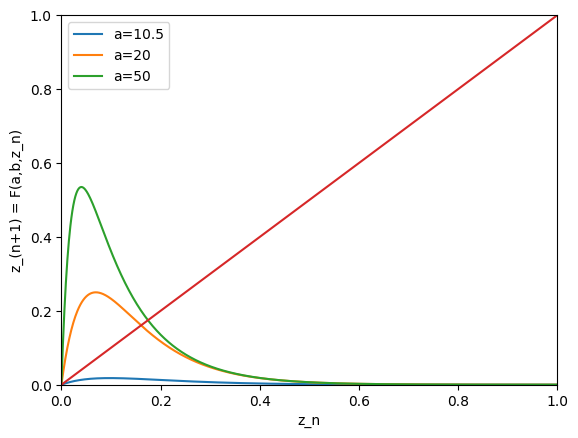

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#Funktion F(a,b,z) implementieren
def F(z, parameter_a, parameter_b):
    if z < 0:
        return 0
    else: # d.h. für 0 <= z:
        return (np.exp(- parameter_b * z) - np.exp(- parameter_a * z))

# Parameter definieren
b = 10

# Z = [0,1]
Z = np.linspace(0, 1, 1000)

# Plot erstellen: Winkelhalbierende und F für b=10 fixiert und a={10.5,20,50} einzeichnen
plt.plot(Z, [F(z,10.5,b) for z in Z])
plt.plot(Z, [F(z,20,b) for z in Z])
plt.plot(Z, [F(z,50,b) for z in Z])
plt.plot(Z,Z)
plt.axis([0,1,0,1])
plt.legend(['a=10.5', 'a=20', 'a=50'])
plt.xlabel('z_n')
plt.ylabel('z_(n+1) = F(a,b,z_n)')
plt.show()

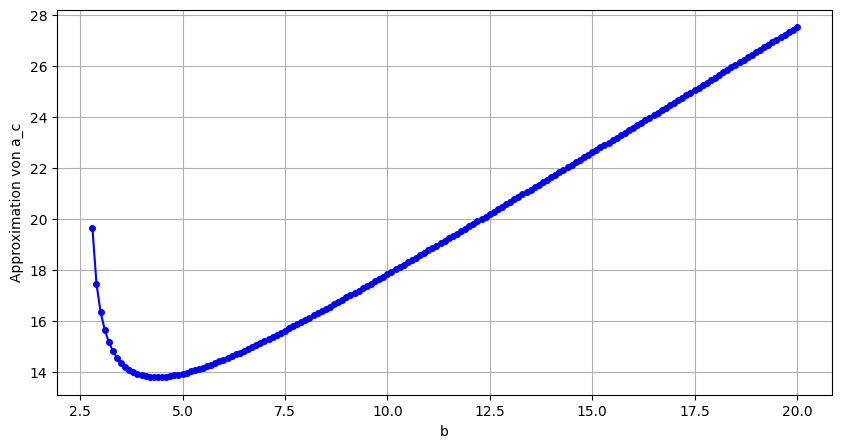

In [2]:
import numpy as np
from scipy.optimize import bisect

def G(z, Parameter_a, Parameter_b):
    if z < 0:
        return 0
    else: # d.h. für 0 <= z:
        return (np.exp(- Parameter_b * z) - np.exp(- Parameter_a * z)) - z

#Ableitung von F auf Z = [0,1]
def dFdz(z, Parameter_a, Parameter_b):
    return -Parameter_b * np.exp(-Parameter_b*z) + Parameter_a * np.exp(-Parameter_a*z)


#Iterative Suche nach dem Parameterwert a, für den F'(z,a,b) = 1 gilt, dort verliert der Fixpunkt z_2* seine Stabilität
#dabei verwenden wir die Monotonie der Ableitung in Abhängigkeit von a
#für die mit der Schrittweite erhaltenen Werte von a im Intervall [a_Untergrenze,a_Obergrenze] approximiert man den Fixpunkt z_2* mit der bisect-Methode
#Für den ersten Wert von a, für den die Ableitung von F in z_2* größer als 1 ist gibt man a zurück
#in diesem Intervall muss der kritische Parameterwert a_c liegen, für den die Ableitung den Wert 1 annimmt
#im nächten Schritt führt man die Suche analog im Intervall [a-vorherige_Schrittweite, a] mit feinerer Schrittweite durch

def iterative_Suche(b, a_Untergrenze, a_Obergrenze, Schrittweite):
    a = a_Untergrenze - Schrittweite
    while a <= a_Obergrenze:
        a += Schrittweite
        try:
            Fixpunkt_z_2 = bisect(G, 0.001, 0.999, args=(a,b)) #bisect Methode, mit der Voraussetzung, dass der Fixpunkt im Intervall [0,001,0.999] liegt
        except ValueError:
            continue
        Ableitung_im_Fixpunkt_z_2 = dFdz(Fixpunkt_z_2, a, b)
        if abs(Ableitung_im_Fixpunkt_z_2) > 1:
            return a
    return None

def Approximation_a_c(b):
    a_Untergrenze = b + 1   #solange a < b+1 existiert der Fixpunkt z_2* nicht
    a_Obergrenze = b + 20
    a_c_approximiert = iterative_Suche(b, a_Untergrenze, a_Obergrenze, 1)
    if a_c_approximiert is None:
        return None
    for i in (0.1, 0.01, 0.001):
        a_c_approximiert = iterative_Suche(b, a_c_approximiert - (i*10), a_c_approximiert, i)
    return a_c_approximiert

# Approximation von a_c für b in 0.1er Schritten aus [1,20] und Ausgabe des Diagramms
Wertebereich_b = np.arange(1, 20.01, 0.1)
a_c_von_b = []

for b in Wertebereich_b:
    if Approximation_a_c(b) is not None:
        a_c_von_b.append(Approximation_a_c(b))  # Kein a_c gefunden
    else:
        a_c_von_b.append(np.nan)

plt.figure(figsize=(10, 5))
plt.plot(Wertebereich_b, a_c_von_b, marker='o', linestyle='-', color='blue', markersize = 4)
plt.xlabel('b')
plt.ylabel('Approximation von a_c')
plt.grid(True)
plt.show()


In [4]:
#Nachrechnen der Bedingungen für das Vorliegen einer Flip Bifurkation
#Implementierung der partiellen Ableitungen
def F_zz(z, Parameter_a, Parameter_b):
    if z < 0:
        return 0
    else: # 0 <= z:
        return (Parameter_b**2) * np.exp(- Parameter_b * z) - (Parameter_a**2) * np.exp(- Parameter_a * z)

def F_zzz(z, Parameter_a, Parameter_b):
    if z < 0:
        return 0
    else: # 0 <= z:
        return -(Parameter_b**3) * np.exp(- Parameter_b * z) + (Parameter_a**3) * np.exp(- Parameter_a * z)

def F_za(z, Parameter_a, Parameter_b):
    if z < 0:
        return 0
    else: # 0 <= z:
        return (1 - (Parameter_a * z)) * np.exp(- Parameter_a * z)

#Wahl von b und z_Untergrenze und z_Obergrenze für die bisect-Methode
b=10
z_Untergrenze = 0.001
z_Obergrenze = 0.999

#Approximation von a_c und Gleichgewichtslösung z_2*(a_c)
a_c = Approximation_a_c(b)
print("a_c approximiert:", a_c)
print("")

z_2 = bisect(G, z_Untergrenze, z_Obergrenze, args=(a_c, b))
print("z_2*(a_c) approximiert:", z_2)
print("")

#sanity check: Überprüfen ob z_2 auch die Fixpunktbedingung erfüllt
print("Voraussetzung 1:z_2 ist ein Fixpunkt, erfüllt also die Fixpunktbedingung F(z_2, a_c, b) - z_2 = 0:")
print(F(z_2, a_c, b) - z_2)
print("")

#Überprüfen der Voraussetzungen aus Theorem 2.6.6
print("Voraussetzung 2: F_z(z_2, a_c, b) = dFdz(z, a_c, b) = -1")
print(dFdz(z_2,a_c,b))
print("")

print("Voraussetzung 3: 1/2 * F_zz(a_c,b,z_2)**2 + 1/3 * (F_zzz(a_c,b,z_2)) != 0")
print(1/2 * (F_zz(z_2, a_c, b)**2) + 1/3 * (F_zzz(z_2, a_c, b)))
print("")

print("Voraussetzung 4: F_za(a_c,b,z_2) != 0")
print(F_za(z_2, a_c, b))

a_c approximiert: 17.822000000000017

z_2*(a_c) approximiert: 0.15205238939045743

Voraussetzung 1:z_2 ist ein Fixpunkt, erfüllt also die Fixpunktbedingung F(z_2, a_c, b) - z_2 = 0:
-1.22843402117212e-12

Voraussetzung 2: F_z(z_2, a_c, b) = dFdz(z, a_c, b) = -1
-1.0000093282539944

Voraussetzung 3: 1/2 * F_zz(a_c,b,z_2)**2 + 1/3 * (F_zzz(a_c,b,z_2)) != 0
52.95935592951756

Voraussetzung 4: F_za(a_c,b,z_2) != 0
-0.1137837176980861


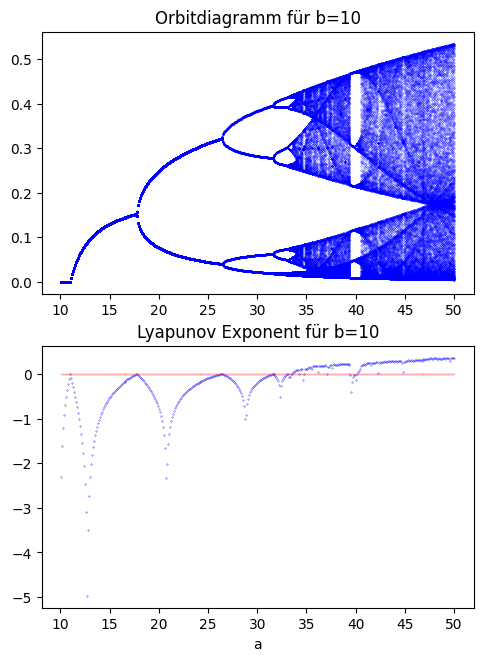

In [5]:
#Erstellen des Orbitdiagramms und des zugehörigen Lyapunov-Exponenten Diagramms

#Berechnet den Orbit (die ersten Anzahl_Iterationen Iterationen) zu einem Anfangswert z für die Parameterwahl a,b
def Orbit_von_z(Parameter_a, Parameter_b, z, Anzahl_Iterationen):
    Zustände = []
    for j in range(Anzahl_Iterationen):
        z = F(z, Parameter_a, Parameter_b)
        Zustände.append(z)
    return Zustände

#Erstellen des Orbitdiagramms
def Orbitdiagramm(Startwert_a, Endwert_a, Schrittweite, b, z0, Anzahl_Iterationen, zu_verwerfende_Iterationen):
    a_Werte = np.linspace(Startwert_a, Endwert_a, int((Endwert_a - Startwert_a) / Schrittweite) + 1) #äquidistante Aufteilung des gewünschten Wertebereiches von a
    for a in a_Werte:
        O = Orbit_von_z(a, b, z0, Anzahl_Iterationen)
        O = O[zu_verwerfende_Iterationen:] #Verwerfen der anfänglichen Werte um nur das langfristige Verhalten abzubilden
        a_array = np.full_like(O, a)
        plt.plot(a_array, O, 'b.', markersize=0.2)
    plt.title("Orbitdiagramm für b={}".format(b))

#Approximation des Lyapunov Exponenten mittels der Formel aus Satz 3.2.2 mit einer endlichen Summe
def Lyapunov_Exponent(Startwert_a, Endwert_a, Schrittweite, b, z0, Anzahl_Iterationen):
    a_Werte = np.linspace(Startwert_a, Endwert_a, int((Endwert_a - Startwert_a) / Schrittweite) + 1)
    Lyapunov_Exponent = []
    for a in a_Werte:
        O = Orbit_von_z(a, b, z0, Anzahl_Iterationen)
        Summe = 0
        for i in range (1, Anzahl_Iterationen+1):
          Summe += np.log(abs(dFdz(O[i-1],a,b)))
        Summe = Summe/Anzahl_Iterationen
        Lyapunov_Exponent.append(Summe)
    plt.plot(a_Werte, Lyapunov_Exponent, 'b.', markersize=0.5)
    #Nulllinie zum Vergleich einzeichnen
    null = np.zeros(int((Endwert_a - Startwert_a)*10))
    plt.plot(a_Werte, null, 'r.', markersize=0.2)
    plt.xlabel('a')
    plt.title("Lyapunov Exponent für b={}".format(b))

# Eingabewerte
b = 10
Startwert_a = b + 0.1
Endwert_a = 50
Schrittweite = 0.1
z0 = 0.7
Anzahl_Iterationen = 1000
zu_verwerfende_Iterationen = 500

#Erstellen der übereinanderausgerichteten Plots
plt.subplot(2, 1, 1)
Orbitdiagramm(Startwert_a, Endwert_a, Schrittweite, b, z0, Anzahl_Iterationen, zu_verwerfende_Iterationen)
plt.subplot(2, 1, 2)
Lyapunov_Exponent(Startwert_a, Endwert_a, Schrittweite, b, z0, Anzahl_Iterationen)
plt.subplots_adjust(bottom=0, right=0.8, top=1.2)
plt.show()